<div style="border: 5px solid purple; padding: 10px; margin: 5px">
<b> Svetlana's comment  </b>
    

Hi Elizabeth, it's Svetlana again. I am very sorry for this egregious delay 🙏 I hope, it didn't cause too much inconvenience. Fortunately, we don't have any technical issues anymore, so let's get started. 


Thank you for submitting such an excellent report! It is well-organized, following a logical structure: what was done, the challenges you faced, the decisions you made, and final results. This makes it easy to follow. You don't need to change anything, because it's great! 
    
Good luck! 

</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>

    
Thank you for your diligence on this and other sprints! I am very glad to see your progress 😊 I hope you enjoyed working on all these projects and learning data science. 
    
    
    
Good luck! 

    
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Elizabeth, my name is Svetlana.  Congratulations on submitting the Final project! 🎉 I will be using the standard the color marking:
    

   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. 


- You did a great job on building a good model for churn prediction.


- The notebook demonstrates strong fundamentals: clean data merging, thoughtful preprocessing, train-test splitting, and meaningful metric evaluation.


    
- It is very good that you add EDA. Distributions and feature correlations may provide helpful context before modeling. In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue.    
    
    
- The data was merged correctly.

  
    
- Hyperparameters tuning was implemented correctly, good! 
    
    

    
- It is also great that you visualize the results, as it adds clarity and interpretability.



- The conclusions clearly describe the results, well done! 
 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project.

</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. 


</div> 

<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you demonstrated strong analytical and coding skills by preparing the data and training the models. There're several issues that need your attention, but the updates should not take much time. Feel free to ask questions if you have any 😉
    


</div>

# Final Project - Churn Prediction for Interconnect
## Project Description:
The goal of this project is to help our client, Interconnect- a telecom operator, be able to forecast their churn of clients. This will benefit them because if they identify that a user is planning to leave, they will offer them promotional codes and special plan options to promote loyalty. In order to complete this task Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

## Description of Interconnect's Services:
Interconnect mainly provides two types of services:
1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable.

Some of their other services include:
- Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
- A dedicated technical support line (TechSupport)
- Cloud file storage and data backup (OnlineBackup)
- TV streaming (StreamingTV) and a movie directory (StreamingMovies)

Clients can choose either a monthly payment option or sign a 1 or 2 year long contract. They can use various payment methods.

## Description of our Data:
The data consists of files obtained from different sources:

- contract.csv — contract information
- personal.csv — the client's personal data
- internet.csv — information about Internet services
- phone.csv — information about telephone services

In each file, the column customerID contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

## Our Project Details:
As previously stated our goal is to accurately predict clients that are planning to cancel their services.  Therefore, in our given data our target feature is: "EndDate". If the column equals "No", the customer is still active, if it equals a date, that is the day the customer left. Through feature engineering this will actual become 'active_plan' where 0 equals an active customer and 1 equals a customer that has left.

Our Primary Metric will be: AUC-ROC

Secondary Metric will be: Accuracy

Assessment Criteria to Determine the Success of our Model:
- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP

# Data Preparation

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [2]:
#Download the data
contracts_df = pd.read_csv('/datasets/contract.csv')
personal_df = pd.read_csv('/datasets/personal.csv')
internet_df = pd.read_csv('/datasets/internet.csv')
phone_df = pd.read_csv('/datasets/phone.csv')

## 1. Contracts

In [3]:
#Look at the contracts data:
contracts_df.info()
display(contracts_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
#fix columns
contracts_df = contracts_df.rename(columns={
    'customerID': 'customer_id',
    'BeginDate' : 'begin_date',
    'EndDate' : 'end_date',
    'PaperlessBilling' : 'paperless_billing',
    'PaymentMethod' : 'payment_method',
    'MonthlyCharges' : 'monthly_charges',
    'TotalCharges' : 'total_charges',
    'Type' : 'type'
})
contracts_df.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [5]:
#check for missing values
contracts_df.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64

In [6]:
#check for duplicates
contracts_df.duplicated().sum()

0

In [7]:
contracts_df['begin_date']= pd.to_datetime(contracts_df['begin_date'], format= '%Y-%m-%d')
print(contracts_df['begin_date'].dtype)

datetime64[ns]


We are actually going to change the "no" values in end_date to missing values so later we can analyze the seasonality of when customers leave.  This is necessary so that we can make the data type of this column datetime64.

In [8]:
contracts_df['end_date'] = contracts_df['end_date'].replace('No', pd.NaT)

In [9]:
contracts_df['end_date'].isna().sum()

5174

In [10]:
contracts_df['end_date']= pd.to_datetime(contracts_df['end_date'], format= '%Y-%m-%d')
print(contracts_df['end_date'].dtype)

datetime64[ns]


In [11]:
contracts_df['customer_id'].describe()

count           7043
unique          7043
top       9500-WBGRP
freq               1
Name: customer_id, dtype: object

In [12]:
contracts_df['begin_date'].describe()

count                    7043
unique                     77
top       2014-02-01 00:00:00
freq                      366
first     2013-10-01 00:00:00
last      2020-02-01 00:00:00
Name: begin_date, dtype: object

In [13]:
contracts_df['end_date'].describe()

count                    1869
unique                      4
top       2019-11-01 00:00:00
freq                      485
first     2019-10-01 00:00:00
last      2020-01-01 00:00:00
Name: end_date, dtype: object

In [14]:
len(contracts_df[contracts_df['end_date'].isna()])/len(contracts_df['end_date'])

0.7346301292063041

Looking into the start and end dates of peoples contracts we can look into:
- Is there any seasonality in when people start/end their service (only 4 dates of people who ended their service)
- How long the average customer who leaves stay before they leave
- Balance of customer data of cancelled contracts vs not (clearly unbalanced 73% of customers are active)

In [15]:
contracts_df['type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: type, dtype: int64

In [16]:
contracts_df['paperless_billing'].value_counts()

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

In [17]:
contracts_df['payment_method'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_method, dtype: int64

Taking a quick look at values in the object columns to ensure there are no implicit duplicates. We can see that there are not. Once in the project we can analyze if/how any of these factors correlate with clients who have left. To implement them into our model we will have to use one hot encoding.

In [18]:
contracts_df['monthly_charges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64

In [19]:
contracts_df['total_charges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: total_charges, dtype: object

In [20]:
contracts_df['total_charges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.9        8
           ..
2901.8      1
6388.65     1
1441.95     1
1522.65     1
786.5       1
Name: total_charges, Length: 6531, dtype: int64

In [21]:
len(contracts_df[contracts_df['total_charges'] == ' '])/len(contracts_df['total_charges'])

0.001561834445548772

There are 11 values in our total charges column that are an empty string which will prevent us from changing this data type to float.  Since this is just over 0.15%, we can drop these values, but it may make merging customer data more challenging down the line.  We will determine if filling these missing values with the mean or median is the best option instead.

In [22]:
total_charge_values = contracts_df[contracts_df['total_charges'] != ' '].describe()
print(total_charge_values)

       monthly_charges
count      7032.000000
mean         64.798208
std          30.085974
min          18.250000
25%          35.587500
50%          70.350000
75%          89.862500
max         118.750000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1adc323be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1adc3392e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1adc323880>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1adc3399a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1adc339d00>],
 'means': []}

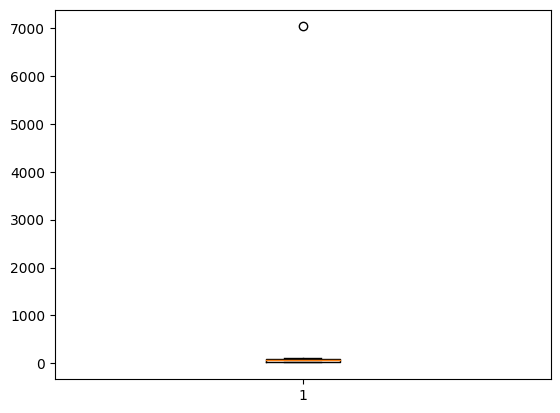

In [23]:
plt.boxplot(total_charge_values)

There are clearly some major outliers that would skew the mean, so we will fill the missing values with the median.

In [24]:
contracts_df['total_charges'] = contracts_df['total_charges'].replace(' ', 70.35)

In [25]:
contracts_df['total_charges'] = contracts_df['total_charges'].astype(float)
print(contracts_df['total_charges'].dtype)

float64


In [26]:
contracts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


Now we can see that we have processed the data and set it up so that we can best use it for our deeper analysis later on.  We will move on to the next personal data set next.

## 2. Personal

In [27]:
personal_df.info()
display(personal_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [28]:
#fix columns
personal_df = personal_df.rename(columns={
    'customerID': 'customer_id',
    'SeniorCitizen' : 'senior_citizen',
    'Partner' : 'partner',
    'Dependents' : 'dependents'
})
personal_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [29]:
personal_df['customer_id'].describe()

count           7043
unique          7043
top       9500-WBGRP
freq               1
Name: customer_id, dtype: object

In [30]:
personal_df['gender'].describe()

count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object

Looking at class balance of these features

In [31]:
len(personal_df[personal_df['gender'] == 'Male'])/len(personal_df['gender'])

0.504756495811444

In [32]:
personal_df['senior_citizen'].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [33]:
len(personal_df[personal_df['senior_citizen'] == 0])/len(personal_df['senior_citizen'])

0.8378531875621185

In [34]:
personal_df['partner'].value_counts()

No     3641
Yes    3402
Name: partner, dtype: int64

In [35]:
len(personal_df[personal_df['partner'] == 'No'])/len(personal_df['partner'])

0.5169672014766434

In [36]:
personal_df['dependents'].value_counts()

No     4933
Yes    2110
Name: dependents, dtype: int64

In [37]:
len(personal_df[personal_df['dependents'] == 'No'])/len(personal_df['dependents'])

0.7004117563538265

We can see that the gender and partner features are fairly balanced, but senior_citizen and dependents are not.  After we merge the data we will perform OHE on the object columns here all the information will be float/int data types.  Then we will make sure that we balance our classes once we split into our training/validation/test sets. 

## 3. Internet

In [38]:
internet_df.info()
display(internet_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [39]:
#drop Unamed column- it does not add any information
internet_df = internet_df.drop(['Unnamed: 0'], axis =1)

In [40]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [41]:
internet_df['session_date']= pd.to_datetime(internet_df['session_date'], format= '%Y-%m-%d')
print(internet_df['session_date'].dtype)

datetime64[ns]


In [42]:
internet_df['id'].describe()

count      149396
unique     149396
top       1498_16
freq            1
Name: id, dtype: object

In [43]:
internet_df['user_id'].value_counts()

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

In [44]:
internet_df['user_id'].nunique()

497

In [45]:
internet_df['session_date'].value_counts()

2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-02       3
2018-01-01       3
Name: session_date, Length: 365, dtype: int64

Based on this information we can see that each value in the id column tracks an individual internet session from each user and all of the sessions are within the year 2018.  We can look at the seasonality of session_dates to get an idea if there is an increase in internet use, but it doesn't seem like these dates will add much value to our model. The id column itself also does not seem like it alone will add much data.  We can use it to create a new column to see how much each user uses the internet.  Then we can also get a total sum of mb_used for each user.

In [46]:
internet_use_df = internet_df.groupby('user_id').agg(
    total_sessions=('id', 'count'),
    total_mb_used=('mb_used', 'sum')
).reset_index()

In [47]:
internet_use_df.info()
display(internet_use_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         497 non-null    int64  
 1   total_sessions  497 non-null    int64  
 2   total_mb_used   497 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 11.8 KB


,user_id,total_sessions,total_mb_used
0,1000,211,107392.31
1,1001,96,32466.00
2,1002,369,116036.52
3,1003,104,57280.64
4,1004,300,149039.48


This new data set will likely add more value to our model than the origianl one if we can see how the user_id correlates with the customer_id from our other data sets. If not we likely will not be able to use this information in our model.

In [48]:
contracts_df['customer_id'].value_counts(ascending=False)

9500-WBGRP    1
5214-CHIWJ    1
4248-HCETZ    1
3166-PNEOF    1
1047-NNCBF    1
             ..
8357-EQXFO    1
1320-HTRDR    1
4962-CHQPW    1
0295-QVKPB    1
7941-RCJOW    1
Name: customer_id, Length: 7043, dtype: int64

In [49]:
internet_df['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 11

In [50]:
num_of_cust_ids = contracts_df['customer_id'].str.extract(r'^(\d{4})').astype(int)

In [51]:
matching_ids = set(internet_df['user_id']) & set(num_of_cust_ids)
print(f"Number of matching IDs: {len(matching_ids)}")

Number of matching IDs: 0


Here we can see that there are no set of numbers in our customer_ids that match the user_ids of internet sessions. Therefore, we will not use this data in our model, although it does give interesting data on how and who uses this data.  We can still analyze it further in our EDA, but it cannot be used to help us predict if a customer will cancel their service or not.

## 4. Phone

In [52]:
phone_df.info()
display(phone_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [53]:
#fix columns
phone_df = phone_df.rename(columns={
    'customerID': 'customer_id',
    'MultipleLines' : 'multiple_lines'
})
phone_df.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

In [54]:
phone_df['multiple_lines'].describe()

count     6361
unique       2
top         No
freq      3390
Name: multiple_lines, dtype: object

This data shows us all of the customers that have at least one phone line.  No meaning they only have 1 phone line and Yes meaning they have at least 2.  When we merge this with the rest of our data, we can change this column to show if a customer doesn't have a phone line at all (0), if they  have a single phone line (1) or multiple phone lines (2).

## 5. Merge our data sets

Here we will merge all of the data sets that we can (contracts_df, personal_df and phone_df) on the customer_id column.  Then we will do our feature engineering prior to getting into our EDA.  First we will merge our contracts_df with our personal_df as these both have a complete set of all of our customers.  Then we will merge ouf phone_df.

In [55]:
customer_df = contracts_df.merge(personal_df, on='customer_id', how='inner')

In [56]:
#confirm data sets merged correctly
customer_df.info()
display(customer_df.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 715.3+ KB


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No


In [57]:
customer_df = customer_df.merge(phone_df, on='customer_id', how='left')

In [58]:
#confirm data sets merged correctly
customer_df.info()
display(customer_df.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  multiple_lines     6361 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory us

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,multiple_lines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,No


In [59]:
#check for duplicate rows
customer_df.duplicated().sum()

0

In [60]:
#check missing values
customer_df.isna().sum()

customer_id             0
begin_date              0
end_date             5174
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines        682
dtype: int64

As we expected from our data preparation we have missing values in end_date for active customers.  After we analyze the seasonality/trends of this data, we can use feature engineering to create a column that describes if customers are active or not (yes/no or 1/0).  Additionally, as we expected there are missing values under multiple_lines as not every customer has a phone line at all. We'll address this next by creating a new column 'phone_line' where 0 = no phone line, 1 = single phone line, 2 = multiple phone lines (at least 2) as we get into feature engineering.

## 6. Feature Engineering

In [61]:
#create new column phone_line based on description above
customer_df['phone_line'] = np.where(
    customer_df['multiple_lines'].isna(), 0,
    np.where(customer_df['multiple_lines'] == 'Yes', 2, 1)
)

In [62]:
customer_df['phone_line'].value_counts()

1    3390
2    2971
0     682
Name: phone_line, dtype: int64

In [63]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  multiple_lines     6361 non-null   object        
 13  phone_line         7043 non-null   int64         
dtypes: datet

In [64]:
#now we can drop the multiple_lines column
customer_df = customer_df.drop(['multiple_lines'], axis =1)

In [65]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  phone_line         7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory us

Next we want to create a column that indicates if a customer is active or not based on the end_date column. When we are doing our EDA we will want to look at the trends and seasonality of the begin_date and end_dates of customers contracts, but when building our model we just need to know if they are still active or if they terminated their contract.  This will change our target feature from 'end_date' to 'active_plan'

In [66]:
#create new column active_plan
customer_df['active_plan'] = np.where(
    customer_df['end_date'].isna(), 0, 1)

In [67]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  phone_line         7043 non-null   int64         
 13  active_plan        7043 non-null   int64         
dtypes: datet

Along these lines we will make a column that describes how long a customer has been active. In our analysis this can give us an idea if there is any correlation between their tenure as an active member and if they will leave. To do this we will fill the missing values for 'end_date' with Feb 1, 2020 as that is when the contract information is valid through.

In [68]:
customer_df['end_date']= customer_df['end_date'].fillna(pd.Timestamp('2020-02-01'))
customer_df['end_date'].isna().sum()

0

In [69]:
customer_df['tenure'] = (customer_df['end_date'] - customer_df['begin_date'])

In [70]:
customer_df['tenure'].value_counts()

31 days      431
2191 days    362
30 days      182
92 days      169
2163 days    164
            ... 
1552 days      2
2070 days      2
1948 days      2
2161 days      1
1917 days      1
Name: tenure, Length: 156, dtype: int64

In [71]:
customer_df['tenure'] = customer_df['tenure'].dt.days.astype(float)

In [72]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  phone_line         7043 non-null   int64         
 13  active_plan        7043 non-null   int64         
 14  tenure  

From here we will move into our in-depth EDA.  We already have an idea, that we will likely drop columns including customer_id, and end_date for our model, but taking a deeper look into our data we can see if there is any other unnecssary columns and or any more that we would like to add. 

# EDA

Let's start by getting an idea of the distribution of our data.

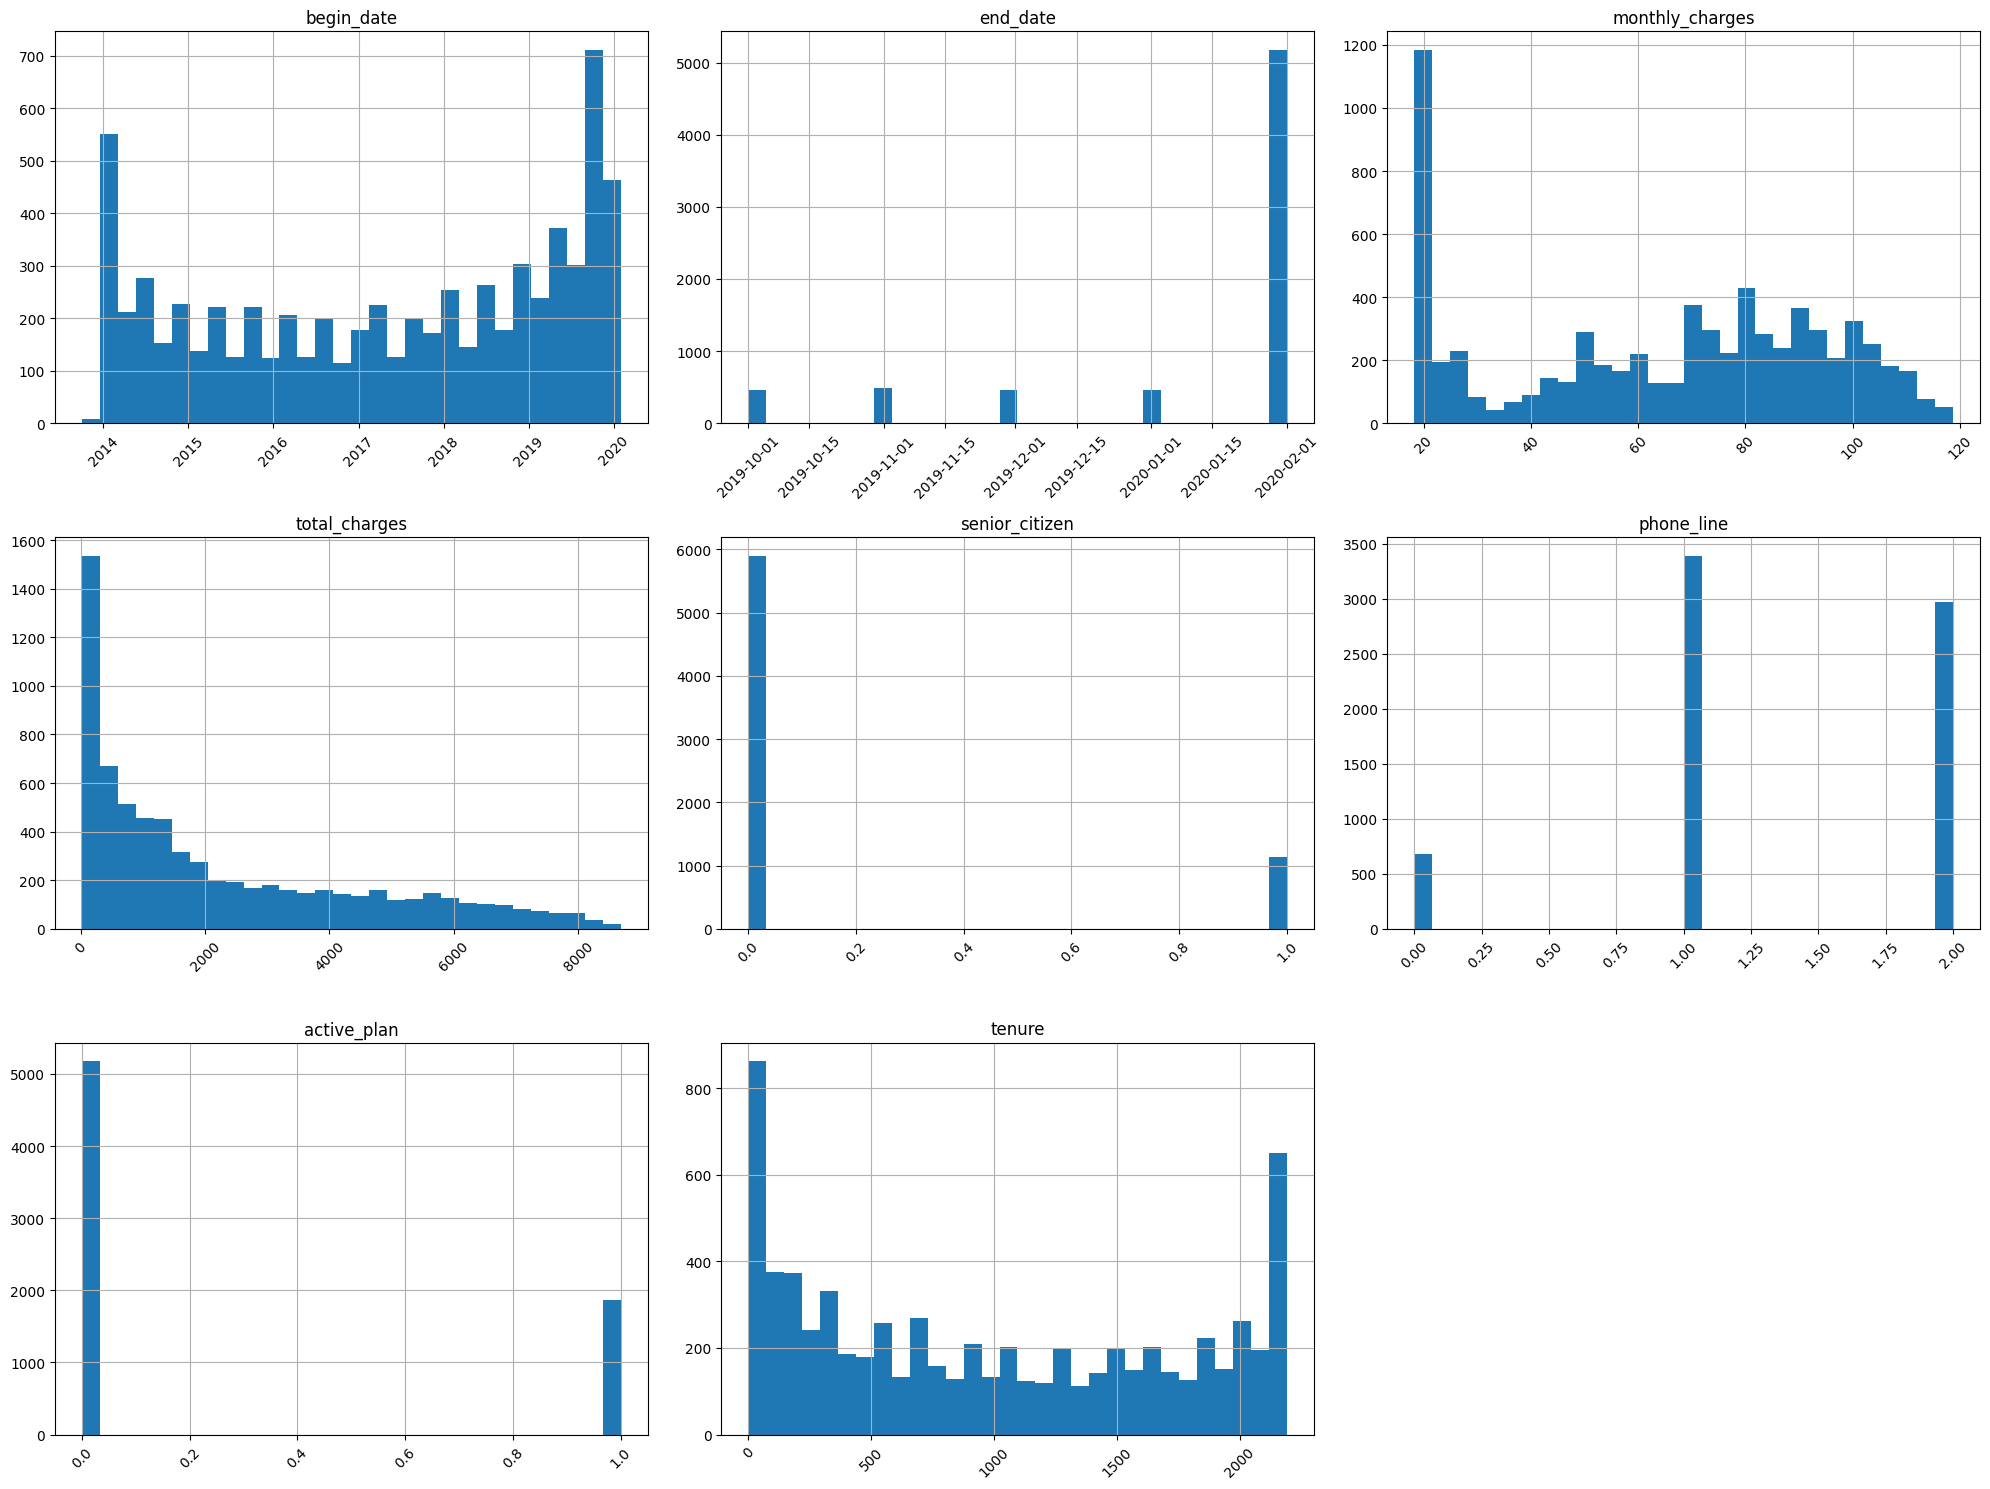

In [73]:
# Numeric histograms
customer_df.hist(bins=30, figsize=(20, 15), xrot=45)
plt.tight_layout()
plt.show()

Here we can get some quick information on our numerical data and our datetype data. We can see that there were spikes in new customers in 2014 and later in 2019. We can dig into this more with looking into seasonality and trends in more depth. Along this line we can see that there are only 4 dates where customers have left. These dates are all the first of the month from Oct 2019- Jan 2020.  It would definetly be worth considering if there was a change in service and/or cost around this time. We can also see that monthly charges are greatly skewed to the left, with a significant amount of customers falling around monthly costs of 20 dollars. Could customers with higher montly charges be more likely to leave?  In this realm total_charges is also skewed to the left with a significant amount of customers having 0 dollars in total charges. Could they be brand new to the service? These customers may skew our data to predict those who are leaving as brand new customers likely are not planning to leave already.  We may want to look deeper into what customers have $0 in total charges as well as those who's begin date is within the last 1-2 months. The senior_citizen chart does demonstrate the class imbalance between non-senior and senior customers. The phone_line graph shows that there are very few customers that do not have a single phone line, most have 1 and a close amount have 2 or more. The active plan graph also depicts the class imbalance between current customers and customers that have left.
Now we will make bar graphs to look into our object type data.

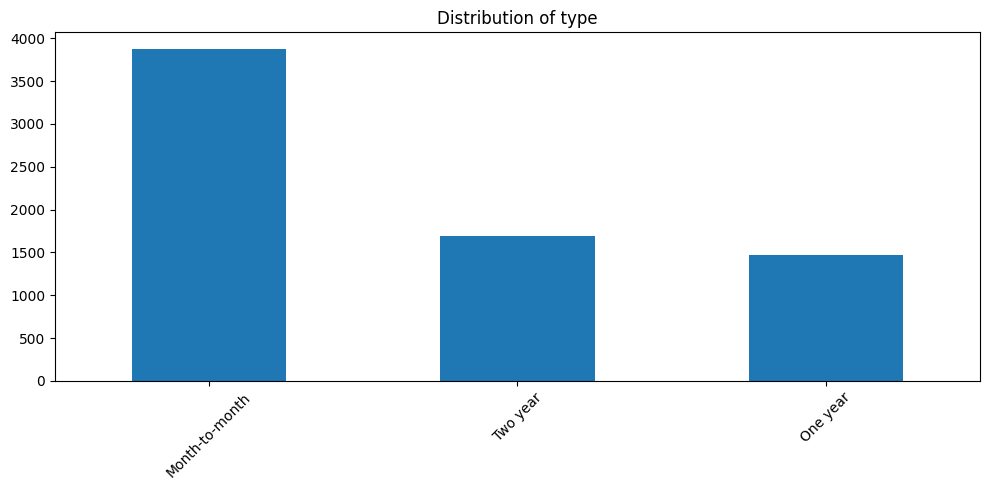

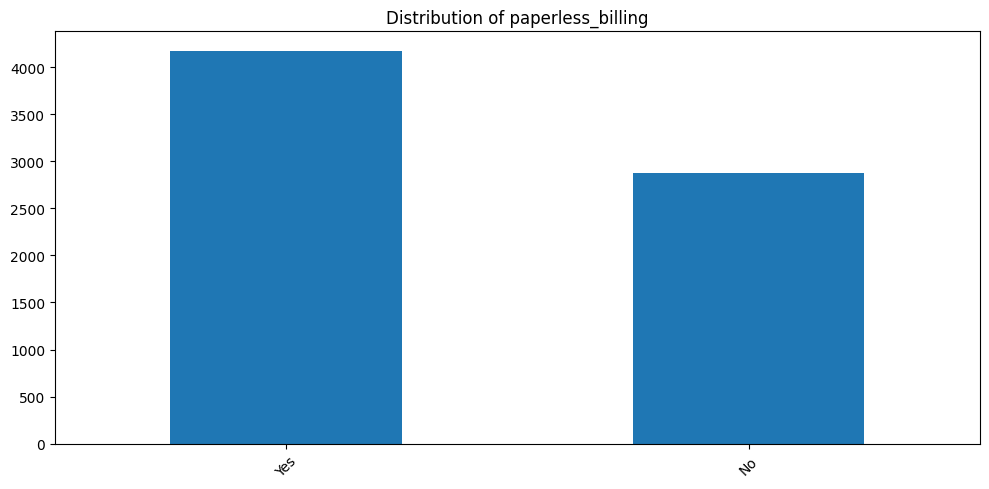

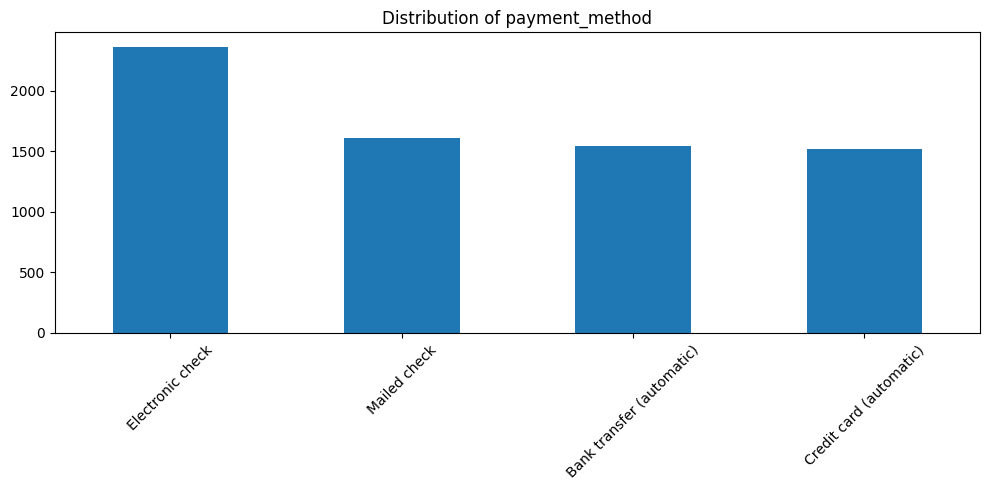

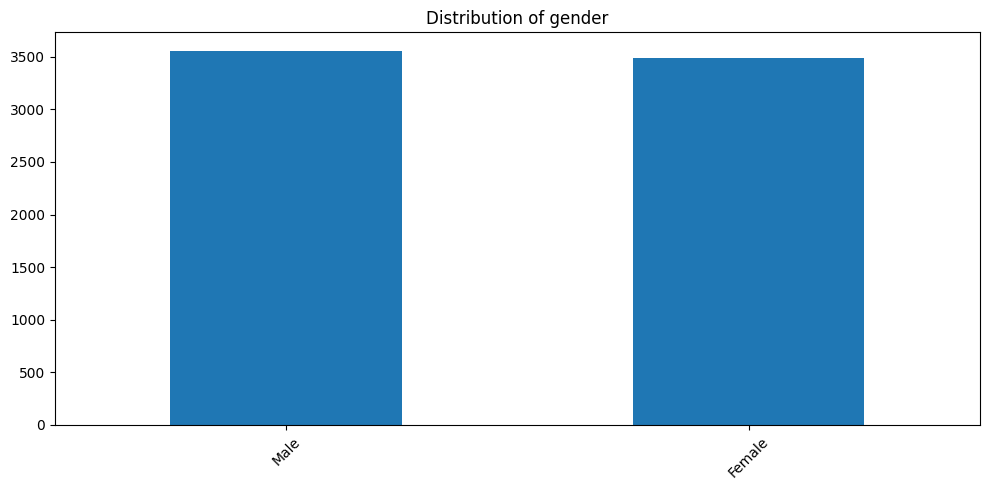

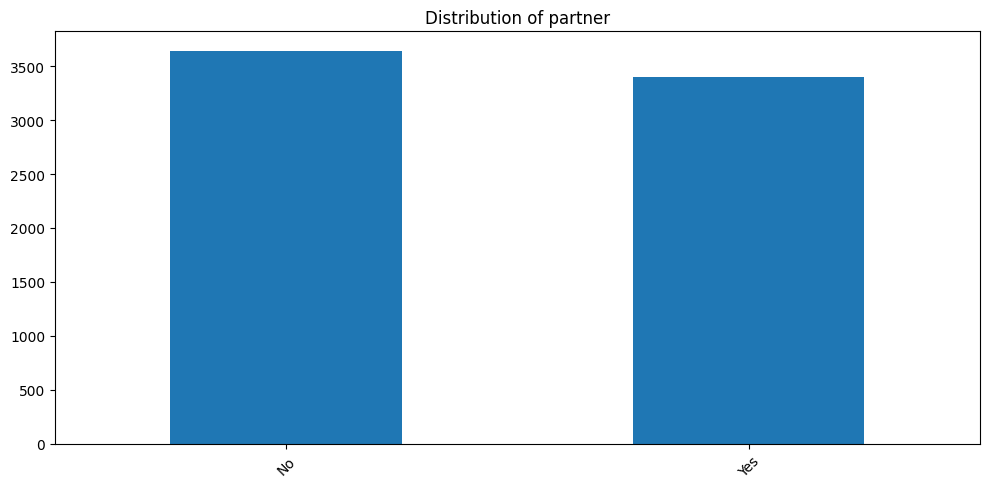

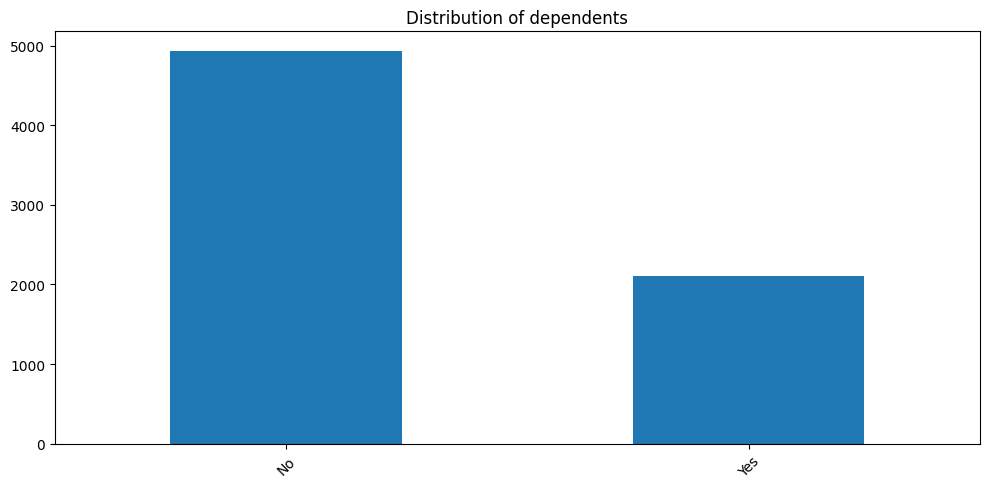

In [74]:
# Categorical bar plots
categorical_cols = customer_df.select_dtypes(include='object').columns
categorical_cols = categorical_cols.drop(['customer_id'])

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    customer_df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Here we can see the distributions of our categorical data.  We dropped the customer_id column as there is a different value for each customer ID so there is no distribution. We can see that most customers choose a month-to-month payment plan vs a 1 or 2 year. We can see that more customers chose paperless billing, and that payment method is fairly evenly split with a majority of customers choosing electronic check. Like we noticed earlier the distribution of gender and customers that have a partner are relatively balanced, while the distribution of customers with dependents is unbalanced. Next we'll dig into the relationship between total charges and new customers.

In [75]:
#Graph Average Total Cost based on Begin Date

customer_df['begin_month'] = customer_df['begin_date'].dt.to_period('M').astype(str)
avg_cost_by_month = customer_df.groupby('begin_month')['total_charges'].mean().reset_index()

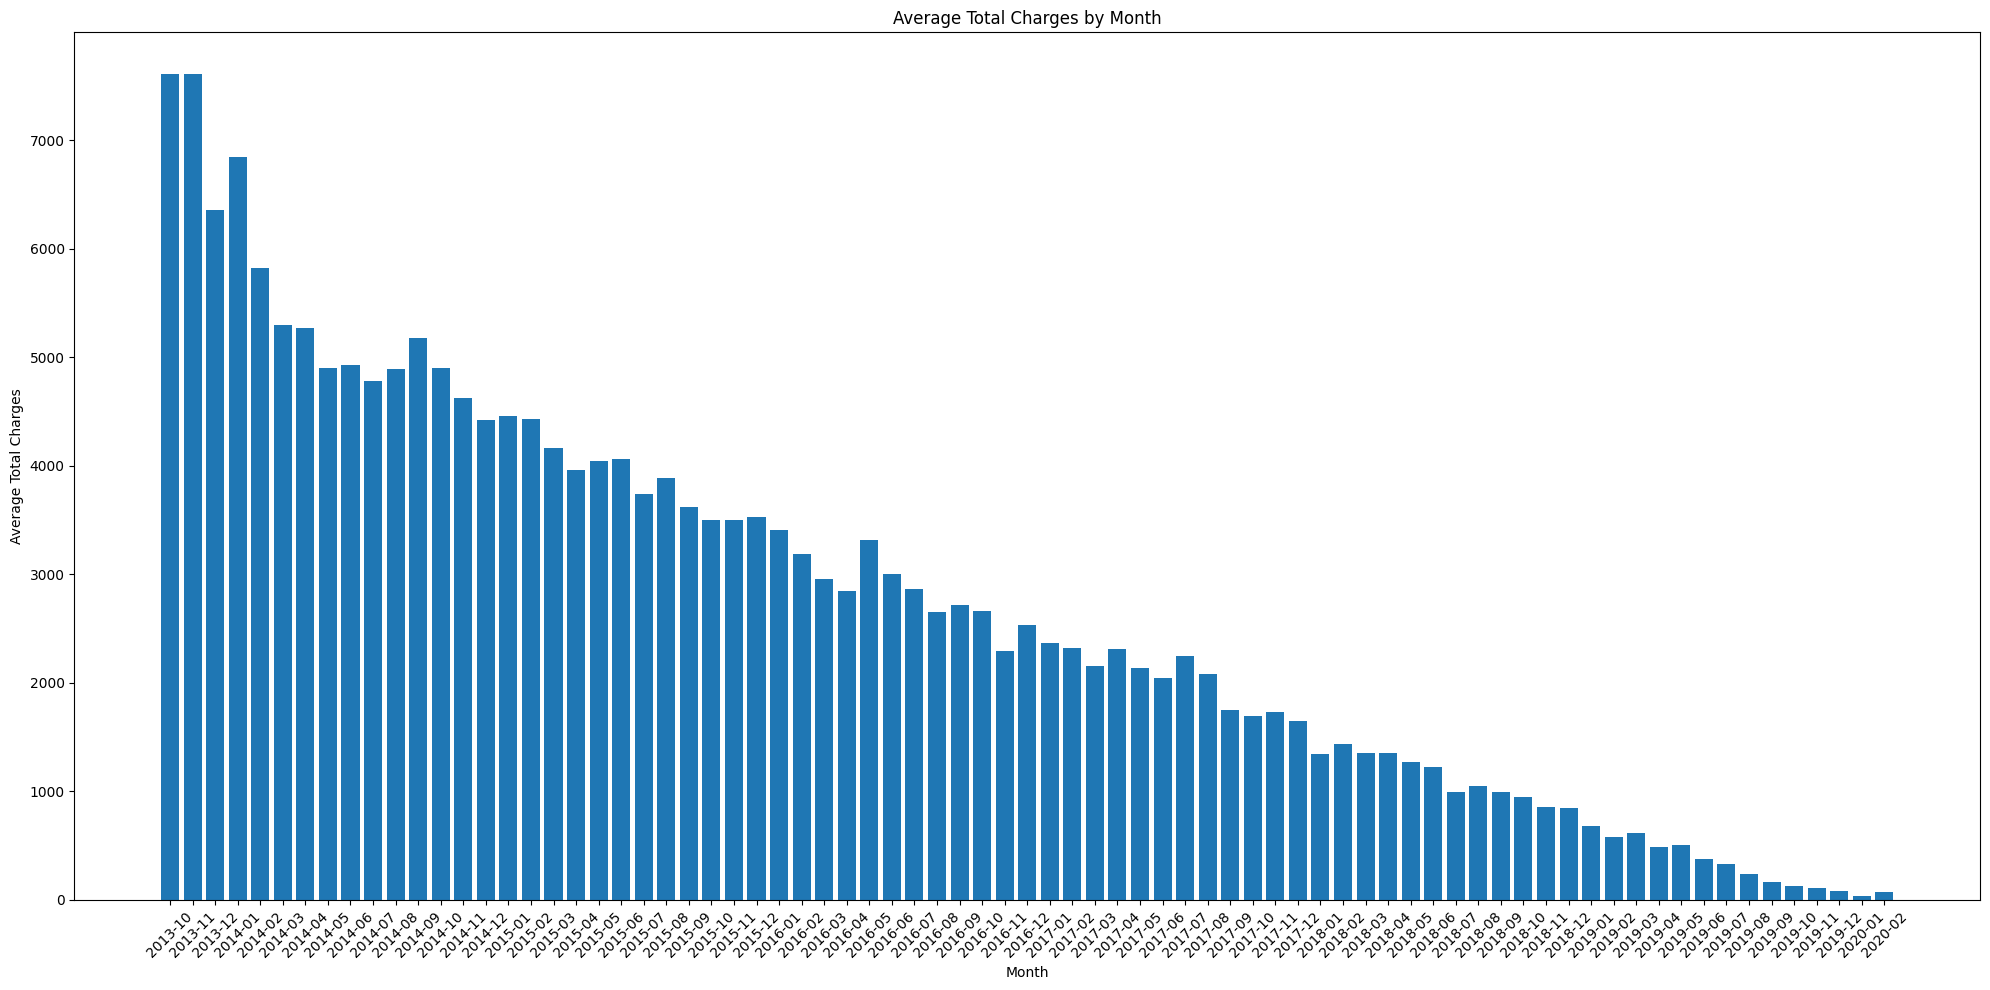

In [76]:
plt.figure(figsize=(20, 10))
plt.bar(avg_cost_by_month['begin_month'], avg_cost_by_month['total_charges'])
plt.title('Average Total Charges by Month')
plt.xlabel('Month')
plt.ylabel('Average Total Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see the average total cost trends down as we get closer to the most recently enrolled customers.  This is to be expected as newer customers haven't been able to spend as much.  There are no amounts of 0, so we will filter out the data to see what the customers with a total charge of $0 look like.

In [77]:
print(customer_df.query("total_charges == 0"))

Empty DataFrame
Columns: [customer_id, begin_date, end_date, type, paperless_billing, payment_method, monthly_charges, total_charges, gender, senior_citizen, partner, dependents, phone_line, active_plan, tenure, begin_month]
Index: []


In [78]:
customer_df['total_charges'].describe()

count    7043.000000
mean     2279.844179
std      2266.685652
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: total_charges, dtype: float64

Now we can be sure that there are no total charges of $0. The first graph we saw for this may have been a bit misleading since the range of total charges is so large, low values appear to be very close to 0. Now we want to look at active plans and total and monthly charges to see if larger costs may correlate to people leaving.

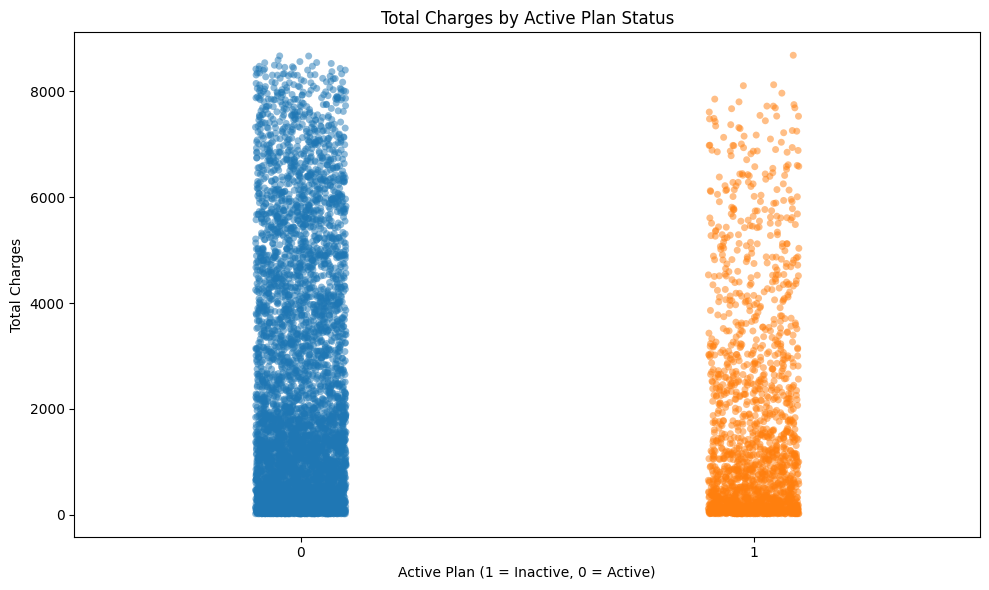

In [79]:
plt.figure(figsize=(10, 6))
plt
sns.stripplot(data=customer_df, x='active_plan', y='total_charges', jitter=True, alpha=0.5)
plt.title('Total Charges by Active Plan Status')
plt.xlabel('Active Plan (1 = Inactive, 0 = Active)')
plt.ylabel('Total Charges')
plt.tight_layout()

plt.show()

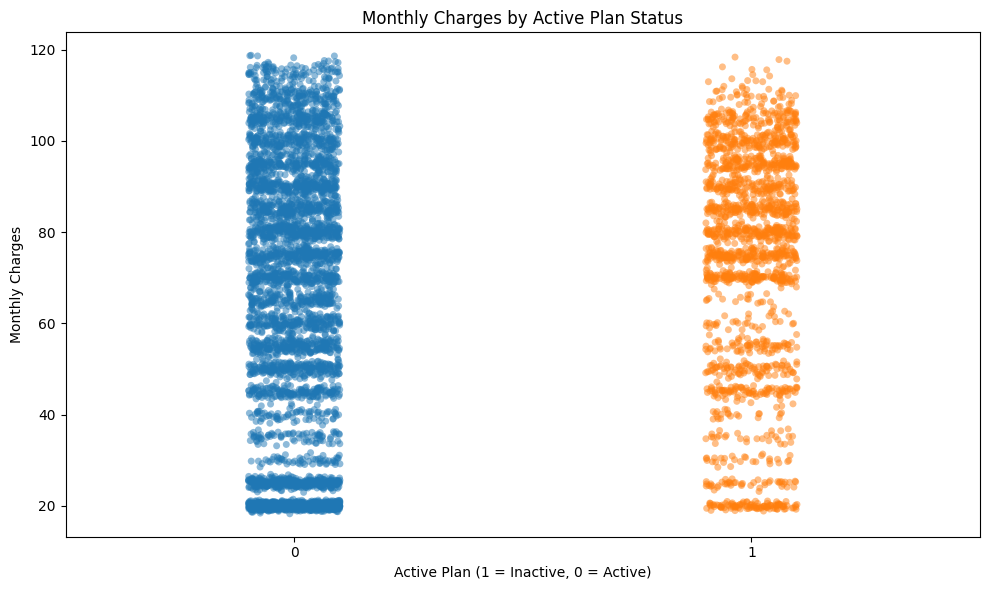

In [80]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=customer_df, x='active_plan', y='monthly_charges', jitter=True, alpha=0.5)
plt.title('Monthly Charges by Active Plan Status')
plt.xlabel('Active Plan (1 = Inactive, 0 = Active)')
plt.ylabel('Monthly Charges')
plt.tight_layout()
plt.show()

The Total Charges graph shows us that total cost doesn't seem to have a significant affect on if a customer will leave as there both active and inactive customers have the greatest density at lower cost and both groups have customers at the higher cost ranges.  For monthly charges, higher costs may be something to consider as there is a higher density of customers that left with higher montly charges, although there are plenty of active customers with the same montly costs. Next we will look at the correlation between a customers tenure and their contract status.

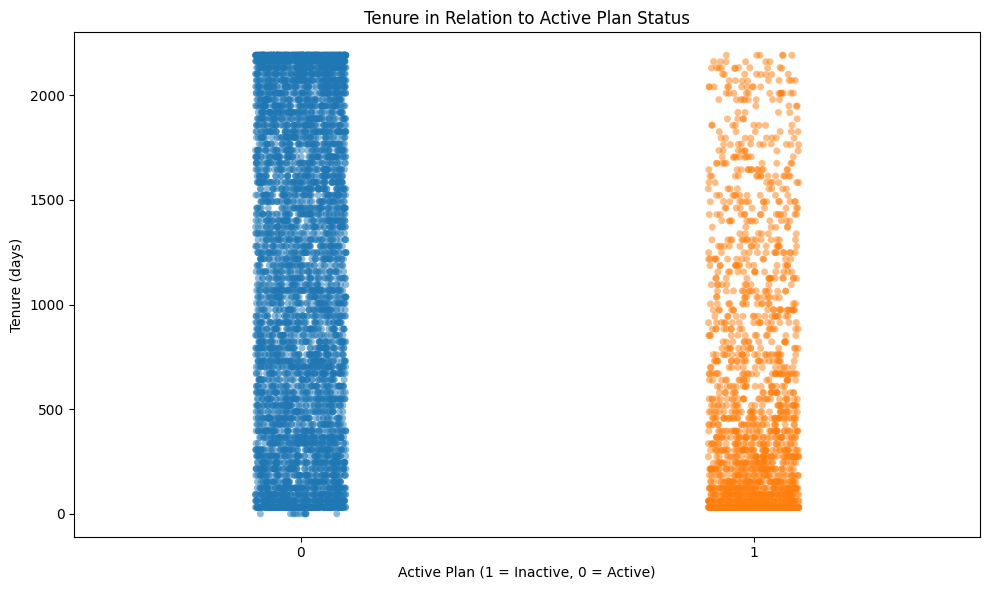

In [81]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=customer_df, x='active_plan', y='tenure', jitter=True, alpha=0.5)
plt.title('Tenure in Relation to Active Plan Status')
plt.xlabel('Active Plan (1 = Inactive, 0 = Active)')
plt.ylabel('Tenure (days)')
plt.tight_layout()
plt.show()

This shows us that a high density of customers that left were relatively new customers (under a year) are the ones that have terminated their plans. This means that it may be worth while to consider giving promotions/incentives to newer clients to promote loyalty.

Now lets look at the seasonality of the begin dates of customers. As we noted previously, there are not enough observations to look at seasonality of customers who left becasue there are only 4 dates when they all left. This timeframe is crucial to look at to see if there was any increase in prices or other cause that may have lead to customers leaving.

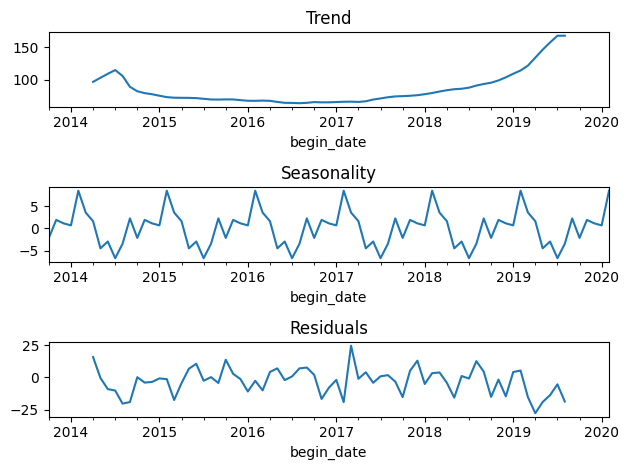

In [82]:
#Begin Date Trend/Seasonality
daily_signups = customer_df.groupby('begin_date').size().asfreq('D').dropna()

decomp_signups = seasonal_decompose(daily_signups)
plt.subplot(311)
decomp_signups.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomp_signups.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomp_signups.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()
plt.show()

We can see that there was a spike in new customers when the company first started, followed by a dip for a few years, but steadily started increasing again around 2018.  Additionally, we can see clear seasonality when clients sign up for services.  It seems that the greatest uptick in new customers is in the begining of the year and is at it's lowest mid year, when it starts to increase again.  This can possibly be described by new year promotions and/or holiday promotions.

Now that we have a better understanding of the data we will use for our model, we can create a dataframe for the model.  We will drop both the begin and end date columns as the specific dates likely won't make a difference in our model, we just need to know if they are active or not. This means we will also get rid of the begin_month column we created to analyze the data.  We will also drop the customer_id feature as this will add no additional information to our model. 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's great that you analyze distributions! Why is this important? In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue.    
</div>

# Create Model Dataframe and Split into Training/Validation/Test Sets

In [83]:
model_df = customer_df.drop(['begin_date', 'end_date', 'begin_month'], axis =1)

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   
After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same.   
   
</div>

In [84]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   gender             7043 non-null   object 
 7   senior_citizen     7043 non-null   int64  
 8   partner            7043 non-null   object 
 9   dependents         7043 non-null   object 
 10  phone_line         7043 non-null   int64  
 11  active_plan        7043 non-null   int64  
 12  tenure             7043 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 1.0+ MB


In [85]:
model_df.isna().sum()

customer_id          0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
phone_line           0
active_plan          0
tenure               0
dtype: int64

In [86]:
model_df.duplicated().sum()

0

When we analyze the duplicates, we find that it is important to keep the unique customer_ids, otherwise there are customers that have all the same data and we get duplicates. Therefore, we might want to change our customer_ids to a customer number to keep customer's individual, but not have them encoded and create thousands of columns with get_dummies.

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Well done! 
</div>

In [87]:
label_encoder = LabelEncoder()
model_df['customer_number'] = label_encoder.fit_transform(model_df['customer_id']) + 1

In [88]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   gender             7043 non-null   object 
 7   senior_citizen     7043 non-null   int64  
 8   partner            7043 non-null   object 
 9   dependents         7043 non-null   object 
 10  phone_line         7043 non-null   int64  
 11  active_plan        7043 non-null   int64  
 12  tenure             7043 non-null   float64
 13  customer_number    7043 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 1.1+ MB


Now we can try dropping the customer_id column and check for duplicates again

In [89]:
model_df = model_df.drop(['customer_id'], axis=1)

In [90]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   gender             7043 non-null   object 
 6   senior_citizen     7043 non-null   int64  
 7   partner            7043 non-null   object 
 8   dependents         7043 non-null   object 
 9   phone_line         7043 non-null   int64  
 10  active_plan        7043 non-null   int64  
 11  tenure             7043 non-null   float64
 12  customer_number    7043 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1.0+ MB


In [91]:
model_df.duplicated().sum()

0

In [92]:
model_df = pd.get_dummies(model_df, drop_first=True)

model_df.columns = model_df.columns.str.lower()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, we need to encode data here, well done! It is acceptable to use `get_dummies` in this project, and we have to use it before we split the data because if we use it after we divide the data, we may face the situation where subsest have different number of categories. 

    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>


-  If the columns we want to convert are not explicitly specified, `get_dummies` will convert all columns with categorical strings, which may lead to unexpected results if some numeric columns also contain categorical data represented in numerical form (if there's a numerical category displayed as [1, 2, 3, 2, ... ]).

  
    
- Please note that `OneHotEncoder(handle_unknown='ignore')` or `OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)` are generally more robust than `get_dummies` because they can handle situations where test subset has features that were not available during training. [Difference between OneHotEncoder and get_dummies](https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/). 
    
    
    
For tree-based models, `OrdinalEncoder` is a better choice because of computational cost. For boosting algorithms, we can rely on internal encoders that usually perform even better than external ones. For `CatBoost`, this is controlled by the `cat_features` parameter. For `LightGBM`, you can convert categorical features to the category type, allowing the model to handle them automatically.
    

    
`OrdinalEncoder()` or `LabelEncoder()` should not be used with linear models if there's no ordinal relationship. [How and When to Use Ordinal Encoder](https://leochoi146.medium.com/how-and-when-to-use-ordinal-encoder-d8b0ef90c28c). For linear regresison, I recommend using `OneHotEncoder(handle_unknown='ignore')`. 


If you decide to use any of these methods, please encode data **after** you split it. 

</div>



In [93]:
model_df.info()
display(model_df.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         7043 non-null   float64
 1   total_charges                           7043 non-null   float64
 2   senior_citizen                          7043 non-null   int64  
 3   phone_line                              7043 non-null   int64  
 4   active_plan                             7043 non-null   int64  
 5   tenure                                  7043 non-null   float64
 6   customer_number                         7043 non-null   int64  
 7   type_one year                           7043 non-null   uint8  
 8   type_two year                           7043 non-null   uint8  
 9   paperless_billing_yes                   7043 non-null   uint8  
 10  payment_method_credit card (automatic)  7043 non-null   uint

,monthly_charges,total_charges,senior_citizen,phone_line,active_plan,tenure,customer_number,type_one year,type_two year,paperless_billing_yes,payment_method_credit card (automatic),payment_method_electronic check,payment_method_mailed check,gender_male,partner_yes,dependents_yes
0,29.85,29.85,0,0,0,31.0,5376,0,0,1,0,1,0,0,1,0
1,56.95,1889.50,0,1,0,1036.0,3963,1,0,0,0,0,1,1,0,0
2,53.85,108.15,0,1,1,61.0,2565,0,0,1,0,0,1,1,0,0
3,42.30,1840.75,0,0,0,1371.0,5536,1,0,0,0,0,0,1,0,0
4,70.70,151.65,0,1,1,61.0,6512,0,0,1,0,1,0,0,0,0


Now our data frame has more features, but yes/no values are represented with 0/1s. You can see for type we now have 2 columns describe 1-year plans and 2-year plans. If there are 0's in both these columns, that represents a customer that has a month-to-month plan.  Likewise, for payment_method we now have columns that represent credit card, electronic check and mailed check. If there are 0's in all 3 of these columns that represents a customer that utilized automatic bank transfers as their payment method. We also dropped the original column to help mitigate the risk of us falling into the dummytrap.

In [94]:
#Define Target and Features
target = model_df['active_plan']
features = model_df.drop('active_plan', axis=1)

In [95]:
display(target)
display(features)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: active_plan, Length: 7043, dtype: int64

,monthly_charges,total_charges,senior_citizen,phone_line,tenure,customer_number,type_one year,type_two year,paperless_billing_yes,payment_method_credit card (automatic),payment_method_electronic check,payment_method_mailed check,gender_male,partner_yes,dependents_yes
0,29.85,29.85,0,0,31.0,5376,0,0,1,0,1,0,0,1,0
1,56.95,1889.50,0,1,1036.0,3963,1,0,0,0,0,1,1,0,0
2,53.85,108.15,0,1,61.0,2565,0,0,1,0,0,1,1,0,0
3,42.30,1840.75,0,0,1371.0,5536,1,0,0,0,0,0,1,0,0
4,70.70,151.65,0,1,61.0,6512,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,2,730.0,4854,1,0,1,0,0,1,1,1,1
7039,103.20,7362.90,0,2,2191.0,1526,1,0,1,1,0,0,0,1,1
7040,29.60,346.45,0,0,337.0,3368,0,0,1,0,1,0,0,1,1
7041,74.40,306.60,1,2,123.0,5935,0,0,1,0,0,1,1,1,0


In [96]:
#Creating our training, validation and test sets 
# 1- split into training (60%) and a temp set (40%)
model_df_train, model_df_temp = train_test_split(model_df, test_size=0.40, random_state=12345)

# 2- split the temp set into validation (20%) and test (20%)
model_df_valid, model_df_test = train_test_split(model_df_temp, test_size=0.50, random_state=12345)

model_df_train.info()
model_df_valid.info()
model_df_test.info()

# 3- create Training set features and target

features_train= model_df_train.drop(['active_plan'], axis = 1)
target_train = model_df_train['active_plan']

features_valid= model_df_valid.drop(['active_plan'], axis = 1)
target_valid = model_df_valid['active_plan']

features_test= model_df_test.drop(['active_plan'], axis = 1)
target_test = model_df_test['active_plan']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 836 to 4578
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         4225 non-null   float64
 1   total_charges                           4225 non-null   float64
 2   senior_citizen                          4225 non-null   int64  
 3   phone_line                              4225 non-null   int64  
 4   active_plan                             4225 non-null   int64  
 5   tenure                                  4225 non-null   float64
 6   customer_number                         4225 non-null   int64  
 7   type_one year                           4225 non-null   uint8  
 8   type_two year                           4225 non-null   uint8  
 9   paperless_billing_yes                   4225 non-null   uint8  
 10  payment_method_credit card (automatic)  4225 non-null   ui

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Yes, we should split data into 3 subsets. 
</div>

In [97]:
features_train.shape

(4225, 15)

In [98]:
target_train.shape

(4225,)

In [99]:
features_valid.shape

(1409, 15)

In [100]:
target_valid.shape

(1409,)

In [101]:
features_test.shape

(1409, 15)

In [102]:
target_test.shape

(1409,)

## Final Prep before building models

In [103]:
# Standardize Numeric Features

numeric = ['monthly_charges', 'total_charges', 'senior_citizen', 'phone_line', 'tenure']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)

(4225, 15)


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's great that you scale data after you split it to prevent data leakage. 

</div>

In [104]:
# Balance of Target Classes

print((len(model_df[model_df['active_plan']== 1]))/ (len(model_df['active_plan'])))

0.2653698707936959


This shows that just over 26.5% of customers in our model dataframe leave.  So our target class is not balanced. We may take this into consideration when fine-tuning our models.

# Building Models
As mentioned in the descrption of this project our goal is to create a model with an auc_roc > 0.85 and good accuracy. 

## Model 1 - Logistic Regression

In [105]:
lr_model = LogisticRegression(random_state=12345, solver= 'liblinear')
lr_model.fit(features_train, target_train)
predicted_valid = lr_model.predict(features_valid)

accuracy_lr = accuracy_score(target_valid,predicted_valid)
print('LR Accuracy Score is:', accuracy_lr)

probabilities_valid = lr_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('LR AUC_ROC is:', auc_roc)

LR Accuracy Score is: 0.7885024840312278
LR AUC_ROC is: 0.8391798406378564


As we can see our Logistic Regression model is already performing fairly well. Our AUC_ROC score is only 0.0071 off from passing.  We will see if tuning this model can help improve our scores.

In [106]:
# balance classes

lr_balanced = LogisticRegression(random_state=12345, solver= 'liblinear', class_weight = 'balanced')
lr_balanced.fit(features_train, target_train)
predicted_valid_balanced = lr_balanced.predict(features_valid)

accuracy_balanced = accuracy_score(target_valid,predicted_valid_balanced)
print('LR-balanced Accuracy Score is:', accuracy_balanced)

probabilities_valid = lr_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid)

print('LR-balanced AUC_ROC is:', auc_roc)

LR-balanced Accuracy Score is: 0.7459190915542938
LR-balanced AUC_ROC is: 0.8391798406378564


Balancing our classes slightly improved our AUC_ROC score by 0.0002, but our accuracy did decrease. We will look into upsampling and downsampling on this model with and without our classes balanced to see which is better. 

In [107]:
# upsampling

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)
#removed the incorrect model where we combined class_weight and resampling

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

Please don't combine using `class_weight` and resampling. Combining these two approaches is not a good idea, since it may lead to redundancy and exaggeration in handling the imbalances, which can adversely affect model's performance. 

    
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 2</b>
    

Correct. 
</div>

In [108]:
#LR model w/o class balancing
lr_upsample = LogisticRegression(random_state=12345, solver= 'liblinear')
lr_upsample.fit(features_upsampled,target_upsampled)
predicted_valid = lr_upsample.predict(features_valid)

accuracy_lr_upsample = accuracy_score(target_valid, predicted_valid)
print('LR-upsampled Accuracy Score is:', accuracy_lr_upsample)

probabilities_valid = lr_upsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('LR-upsampled AUC_ROC is:', auc_roc)

LR-upsampled Accuracy Score is: 0.5826827537260468
LR-upsampled AUC_ROC is: 0.8413107867677421


Upsampling brought our accuracy down significantly while decreasing our AUC-ROC significantly.  We will not keep it in our next iteration of the model.  Next we will look at downsampling

In [109]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

#again removed the incorrect model combining resampling with class weight

<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Same issue. 
</div>

In [110]:
#LR model w/ class balancing
lr_downsample = LogisticRegression (random_state = 12345, solver = 'liblinear')
lr_downsample.fit(features_downsampled,target_downsampled)
predicted_valid = lr_downsample.predict(features_valid)

accuracy_lr_downsample = accuracy_score(target_valid, predicted_valid)
print('LR-downsampled Accuracy Score is:', accuracy_lr_downsample)

probabilities_valid = lr_downsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('LR-downsampled AUC_ROC is:', auc_roc)

LR-downsampled Accuracy Score is: 0.5691980127750177
LR-downsampled AUC_ROC is: 0.8388051407800894


Downsampling also did not help improve our accuracy or our AUC_ROC.  Next we will adjust our threshold values with our unsampled features as those provided the best AUC-ROC score so far.

In [111]:
lr_threshold = LogisticRegression(random_state=12345, solver='liblinear')
lr_threshold.fit(features_train,target_train)
probabilities_valid = lr_threshold.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.5, 0.8, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    accuracy = accuracy_score(target_valid, predicted_valid)

    print(
            'Threshold = {:.2f} | AUC_ROC = {:.4f}, Accuracy = {:.3f}'.format(
                threshold, auc_roc, accuracy
            )
        )

Threshold = 0.50 | AUC_ROC = 0.8392, Accuracy = 0.789
Threshold = 0.52 | AUC_ROC = 0.8392, Accuracy = 0.786
Threshold = 0.54 | AUC_ROC = 0.8392, Accuracy = 0.789
Threshold = 0.56 | AUC_ROC = 0.8392, Accuracy = 0.791
Threshold = 0.58 | AUC_ROC = 0.8392, Accuracy = 0.789
Threshold = 0.60 | AUC_ROC = 0.8392, Accuracy = 0.789
Threshold = 0.62 | AUC_ROC = 0.8392, Accuracy = 0.786
Threshold = 0.64 | AUC_ROC = 0.8392, Accuracy = 0.779
Threshold = 0.66 | AUC_ROC = 0.8392, Accuracy = 0.774
Threshold = 0.68 | AUC_ROC = 0.8392, Accuracy = 0.769
Threshold = 0.70 | AUC_ROC = 0.8392, Accuracy = 0.761
Threshold = 0.72 | AUC_ROC = 0.8392, Accuracy = 0.754
Threshold = 0.74 | AUC_ROC = 0.8392, Accuracy = 0.753
Threshold = 0.76 | AUC_ROC = 0.8392, Accuracy = 0.745
Threshold = 0.78 | AUC_ROC = 0.8392, Accuracy = 0.741
Threshold = 0.80 | AUC_ROC = 0.8392, Accuracy = 0.737


<div style="border: 5px solid red; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
And here. 
</div>

AUC_score isn't changed from our upsampled model since it is based on constant probabilities.  However our best accuracy is achieved at a threshold value of 0.56 with an accuracy of 0.791.  It seems that our LR model does a solid job, but we will test other models to see if we can do better.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 2</b>
    

Great! 
</div>

## Model 2 - Random Forest

In [112]:
rf_model = RandomForestClassifier(random_state=12345)
rf_model.fit(features_train, target_train)
predicted_valid = rf_model.predict(features_valid)

print('RF Accuracy:', accuracy_score(target_valid, predicted_valid))

probabilities_valid = rf_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


print('RF AUC-ROC:', auc_roc)

RF Accuracy: 0.8176011355571328
RF AUC-ROC: 0.8512250391268219


A basic Random Forest model already improves our accuracy and our AUC-ROC.  We will fine-tune this model to see if we can reach our threshold.

In [113]:
rf_model = RandomForestClassifier(random_state=12345, class_weight= 'balanced')
rf_model.fit(features_train, target_train)
predicted_valid = rf_model.predict(features_valid)

print('RF Accuracy:', accuracy_score(target_valid, predicted_valid))

probabilities_valid = rf_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


print('RF AUC-ROC:', auc_roc)

RF Accuracy: 0.8140525195173882
RF AUC-ROC: 0.856665834000316


Balancing our classes actually decreased our accuracy and AUC-ROC score.  We will not carry it through.  Next we will try upsampling.

In [114]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled,target_upsampled)
predicted_valid = model.predict(features_valid)

print('RF Accuracy:', accuracy_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


print('RF AUC-ROC:', auc_roc)

RF Accuracy: 0.8041163946061036
RF AUC-ROC: 0.8503864251594386


Upsampling further decreased our scores.  Finally, we will try to hypertune our parameters to see if we can improve our random forest model even more.

In [115]:
best_score = 0
best_est = 0
for est in range(10, 100, 10): # choose hyperparameter range
    rf_model = RandomForestClassifier(random_state=12345, n_estimators= est) # set number of trees
    rf_model.fit(features_train, target_train) # train model on training set
    predicted_valid = rf_model.predict(features_valid)
    probabilities_valid = rf_model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    score = roc_auc_score(target_valid, probabilities_one_valid) # calculate AUC-ROC score on validation set
    if score > best_score:
        best_score = score# save best AUC-ROC score on validation set
        best_est = est# save number of estimators corresponding to best F1 score
        
print("AUC_ROC score of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

AUC_ROC score of the best model on the validation set (n_estimators = 90): 0.8505113251120276


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
You have successfully implemented hyperparameters tuning! 

</div>

In [116]:
best_score = 0
best_depth = 0
for depth in range(10, 100, 10): # choose hyperparameter range
    rf_model = RandomForestClassifier(random_state=12345, max_depth=depth) # set depth
    rf_model.fit(features_train, target_train) # train model on training set
    predicted_valid = rf_model.predict(features_valid)
    probabilities_valid = rf_model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    score = roc_auc_score(target_valid, probabilities_one_valid) # calculate AUC-ROC score on validation set
    if score > best_score:
        best_score = score# save best AUC-ROC score on validation set
        best_depth = est# save number of estimators corresponding to best F1 score
        
print("AUC_ROC score of the best model on the validation set (max_depth = {}): {}".format(best_depth, best_score))

AUC_ROC score of the best model on the validation set (max_depth = 90): 0.8606932202266551


Running through these loops we see that our AUC_ROC score is best with 80 trees and a max_depth of 90. We will run it with both of these parameters. with a max_depth of 90 we do meet our threshold AUC-ROC.

In [117]:
rf_model = RandomForestClassifier(random_state=12345, n_estimators= 80, max_depth=90)
rf_model.fit(features_train, target_train)
predicted_valid = rf_model.predict(features_valid)


probabilities_valid = rf_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid)
acc_rf = accuracy_score(target_valid, predicted_valid)

print('RF Accuracy:', acc_rf)

print('RF AUC-ROC:', auc_roc)

RF Accuracy: 0.8147622427253371
RF AUC-ROC: 0.8503864251594386


When combining these 2 hyperparameters by AUC-ROC goes down.  We will try with just the max_depth hyperparameter to see if it goes back up.

In [118]:
rf_model = RandomForestClassifier(random_state=12345, max_depth=90)
rf_model.fit(features_train, target_train)
predicted_valid = rf_model.predict(features_valid)


probabilities_valid = rf_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('RF Accuracy:', accuracy_score(target_valid, predicted_valid))

print('RF AUC-ROC:', auc_roc)

RF Accuracy: 0.8176011355571328
RF AUC-ROC: 0.8512250391268219


As we can see it does not reliably stay above threshold.  We will try another model.

## Model 3 - XG Boost

In [119]:
xgb_model = XGBClassifier(random_state=12345, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(features_train, target_train)

xgb_pred = xgb_model.predict(features_valid)
xgb_probs = xgb_model.predict_proba(features_valid)[:, 1]

xgb_acc = accuracy_score(target_valid, xgb_pred)
xgb_auc = roc_auc_score(target_valid, xgb_probs)

print("XGBoost Accuracy:", xgb_acc)
print("XGBoost AUC-ROC:", xgb_auc)

XGBoost Accuracy: 0.8516678495386799
XGBoost AUC-ROC: 0.8892621726474204


This Model has given us our best AUC_ROC and accuracy yet, well surpasing our minimum threshold. We will still look at Light GBM and CatBoost models to see if we can do even better.

## Model 4 - Light GBM

In [120]:
lgb_model = LGBMClassifier(random_state=12345)
lgb_model.fit(features_train, target_train)

lgb_pred = lgb_model.predict(features_valid)
lgb_probs = lgb_model.predict_proba(features_valid)[:, 1]

lgb_acc = accuracy_score(target_valid, lgb_pred)
lgb_auc = roc_auc_score(target_valid, lgb_probs)

print("LightGBM Accuracy:", lgb_acc)
print("LightGBM AUC-ROC:", lgb_auc)

LightGBM Accuracy: 0.8403122782114976
LightGBM AUC-ROC: 0.8852322374424569


Our Light GBM model does better than our random forest or LR models, but it is not as good as our XG Boost model. 

## Model 5 - CatBoost

In [121]:
cat_model = CatBoostClassifier(verbose=0, random_state=12345)
cat_model.fit(features_train, target_train)

cat_pred = cat_model.predict(features_valid)
cat_probs = cat_model.predict_proba(features_valid)[:, 1]

cat_acc = accuracy_score(target_valid, cat_pred)
cat_auc = roc_auc_score(target_valid, cat_probs)

print("CatBoost Accuracy:", cat_acc)
print("CatBoost AUC-ROC:", cat_auc)

CatBoost Accuracy: 0.8417317246273953
CatBoost AUC-ROC: 0.8871210306030374


Our CatBoost Model comes close to our XG Boost model, but our AUC_ROC and Accuracy is still slightly better with our XG Boost.  We can do a final comparison of all our best models below.

## Best Model Comparisons

In [122]:
print(f"Logistic Regression AUC: {auc_roc_lr:.4f}", f"LR Accuracy: {accuracy_balanced:.4f}")
print(f"Random Forest AUC: {auc_roc_rf:.4f}", f"RF Accuracy: {acc_rf:.4f}")
print(f"XGBoost AUC: {xgb_auc:.4f}", f"XGB Accuracy: {xgb_acc:.4f}")
print(f"LightGBM AUC: {lgb_auc:.4f}", f"LGBM Accuracy: {lgb_acc:.4f}")
print(f"CatBoost AUC: {cat_auc:.4f}", f"CatBoost Accuracy: {cat_acc:.4f}")

Logistic Regression AUC: 0.8433 LR Accuracy: 0.7459
Random Forest AUC: 0.8500 RF Accuracy: 0.8148
XGBoost AUC: 0.8893 XGB Accuracy: 0.8517
LightGBM AUC: 0.8852 LGBM Accuracy: 0.8403
CatBoost AUC: 0.8871 CatBoost Accuracy: 0.8417


Here we can clearly see that our XGBoost model has the best AUC_ROC and the best accuracy scores. Now we will test this model.

# Test Best Model- XGBoost

In [123]:
xgb_pred_test = xgb_model.predict(features_test)
xgb_probs_test = xgb_model.predict_proba(features_test)[:, 1]

xgb_acc_test = accuracy_score(target_test, xgb_pred_test)
xgb_auc_test = roc_auc_score(target_test, xgb_probs_test)

print("XGBoost Accuracy:", xgb_acc_test)
print("XGBoost AUC-ROC:", xgb_auc_test)

XGBoost Accuracy: 0.8325053229240597
XGBoost AUC-ROC: 0.8764048642871977


Our model still has excellent accuracy and AUC-ROC scores that are well over our threshold demonstrating that our model can reliably predict if a customer will terminate their contract with Interconnect.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Well done! 

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
   

You can also display the ROC curve for a better representation, since it shows us how well the model separates the classes.   
     
</div>

# Conclusion (Solution Report)

## Final Model:
Based on our results the XGBoost model is the most effective in predicting churn of Interconnect customers as it has the highest accuracy (0.8325) and AUC-ROC (0.8764) scores.  We can say this with confidence as we tuned and tested 5 different models, all with AUC-ROC scores that were much better than chance or 0.5 (all over 0.8).  Therefore, Interconnect can use this model to identify customers that may leave so that they can offer promotions or benefits to encourage loyalty. 

## Plan Steps Performed:
Overall the proposed plan was followed fairly closely.  We started by importing all the necessary libraries and modules as well as our data.  We performed some inital data exploration and preprocessed all the data from each data set provided.  Once the preprocessing was complete we merged our datasets into one data frame.  We were unable to do so with the internet data frame as there was no correlating column to merge it on.  Then we performed deeper EDA to better understand the features in our model data set.  We did skip this step for our internet data frame as it would not add any information to our model at this time. Then we removed unnecessary features, and then we re-reviewed the data.  We had to perform more feature engineering then originally planned at this phase to prevent lost data.  From here we split our data into our training, validation and test sets and scaled our data. Next we tested our models, starting with logistic regression. We did skip the Decision Tree Model which we initially proposed and spent more time working with Boosting models and random forests.  We skipped this model for time purposes as the models we focused on are generally more robust. Finally, we took our best performing model, the XGBoost and tested it to ensure it wasn't overfitted to our training set.

## Difficulties Encountered
The biggest difficulty we found was in preprocessing our data with the internet data set. I tried to look at the different columns in a few different ways to see if we could correlate it to the rest of our data, but there was nothing I could find.  If Interconnect really wants to see how this information impacts customer loyalty, I would recommend them finding the customer ID's of those clients who have internet services. We dealt with this by excluding it from our model. Another difficulty that I came across on my first code interation was that I accidentally created some duplicate columns by dropping the customer ID column without analzying if there were clients with the exact same values for the other features. To address this I analyzed the duplicates and used label encoding to create a single numerical feature to differentiate individual customers in a way our model could handle. I also had some initial difficulties on how I wanted to look at the distribution of current vs inactive customers with their monthly and total costs as well as their tenure as a client.  To solve this I looked into a few different graphs and tested them out in my intial review and decided to leave the stripplots as I liked the way they displayed the information best.

## Key Steps
There were some steps that were vital in being able to solve this task. First, in preprocessing identifying the column that we were able to merge our data on (customer_id), and making sure that these columns were all formated the same. Then ensuring that all the data was merged without any data leakage and addressing any new missing values.  The next step that was crucial was the feature engineering. Making sure we had all the most valuable data for our model was necessary for the best performance, as well as determining the right features to remove. This helped ensure that our models ran as efficiently as possible. Finally, training and analzying mutliple models and tuning them in different ways to see what worked best with our data.

## Other Key Findings
We identified through our EDA is that all customers that have left did so at the end of the year on the first of the month in 2019 and on the first of the month in January 2020. If any of their services or costs changed during this time it may benefit to address this.  Additionally, it would benefit to offer customers that have been identified as potentials to terminate their service any offerings before the 1st of the month as this is when they are most likely to leave.

We also did notice some correlation in customers that have higher monthly charges and have been with Interconnect for less than a year are more likely to leave.  Focusing promotions on decreasing monthly costs and or benefits for longer term contracts may be ways to improve customer loyalty.

Finally, we found that most clients start their service at the begining or end of the year, with the greatest dip being in the middle of the year.  These months may be a good time to run promotions to help draw in new business. 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Excellent job! You have successfully met the requirements! 
</div>